# Homework 3 - K-means
## Name: Sondre Kongsgaard
## Collaboration group: Anders Vagle, Brage Saether, Morten Lie

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

N = 200 # Number of samples

def generate_gaussian_components(N):
    m_1 = [0, 0]
    C_1 = [[2, 0], [0, 1]]
    m_2 = [-2, 1]
    C_2 = [[9.0/8, 7.0/8], [7.0/8, 9.0/8]]
    m_3 = [3, 2]
    C_3 = [[2, 1], [1, 2]]
    
    pi_1 = 1.0/2
    pi_2 = 1.0/6
    
    x = np.zeros((N, 2))
    z = np.zeros((N, 3)) # One-hot encoding
    for i in range(0, N):
        a = random.uniform(0, 1)
        if (a < pi_1):
            x[i, :] = np.random.multivariate_normal(m_1, C_1, 1)
            z[i][0] = 1
        elif (a < pi_1 + pi_2):
            x[i, :] = np.random.multivariate_normal(m_2, C_2, 1)
            z[i][1] = 1
        else:
            x[i, :] = np.random.multivariate_normal(m_3, C_3, 1)
            z[i][2] = 1
    return x, z

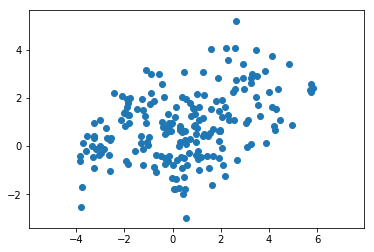

In [2]:
# Three Gaussian components, N samples
x, z = generate_gaussian_components(N)
plt.scatter(x[:, 0], x[:, 1])
plt.axis('equal')
plt.show()

In [3]:
def k_means(N, K, C, x):
    C_new = np.zeros((N, 1))
    m = np.zeros((K, 2))
    while True:
        # Assignment step
        for i in range(N):
            min_distance = math.inf
            for j in range(1, K + 1):
                distance = np.linalg.norm(x[i] - m[j-1])
                if distance < min_distance:
                    C_new[i] = j
                    min_distance = distance
        
        # Update step
        for j in range(1, K + 1):
            C_abs = 0
            for i in range(N):
                if C[i] == j:
                    C_abs += 1
                    m[j-1][:] += x[i][:]
            if C_abs == 0:
                C_abs = 1
            m[j-1, :] /= C_abs
        
        # Check for convergence
        if np.all(C_new == C):
            return C_new, m
        
        C = C_new
        
def mean_squared_error(x,C,m):
    N = len(x)
    K = len(m)
    smse = np.zeros((K,1))
    for i in range(N):
        j = int(C[i])
        smse[j-1] += np.linalg.norm(x[i] - m[j-1])
    mse = np.sum(smse) / N
    return mse

In [4]:
n_random_initializations = 5
K_max = 5

C_optimal = np.zeros((N, K_max))
m_optimal = np.zeros((K_max, 2, K_max))

for K in range(2, K_max+1):
    min_mse = math.inf
    for i in range(n_random_initializations):
        C = np.random.randint(1, high=K+1, size=(N, 1)) # Exclusive high
        C, m = k_means(N,K,C,x)
        mse = mean_squared_error(x,C,m)
        if mse < min_mse:
            C_optimal[:, K-1] = C.T
            m_optimal[0:K, :, K-1] = m
            min_mse = mse
print("K-means complete")

K-means complete


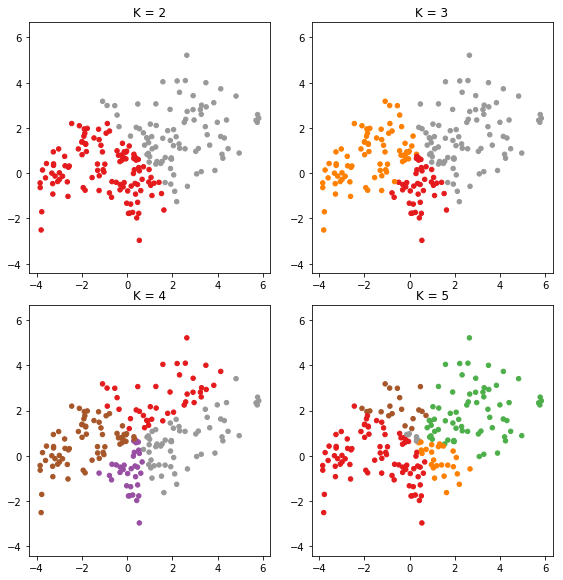

In [5]:
# Compute one-hot encoding 
a = np.zeros((N, K_max, K_max))
for K in range(2, K_max + 1):
    for i in range(N):
        a[i][int(C_optimal[i][K-1])-1][K-1] = 1

fig, axes = plt.subplots(2, 2, figsize=(8,8))
fig.tight_layout()
for K in range(2, K_max+1):
    row = int(K/2) - 1
    col = (K - 2) % 2
    axes[row, col].scatter(x[:, 0], x[:, 1], c=np.where(a[:,:,K-1])[1], s=20, cmap='Set1')
    axes[row, col].set_title("K = %s"%K)
    axes[row, col].axis('equal')
plt.show()